In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def apply_thresholding_methods(image_path: str) -> tuple:
    """
    Apply different thresholding methods to a grayscale image and display results.
    
    Args:
        - image_path (str): Path to the input image

    Returns:
        - img (np.ndarray): Original grayscale image
        - binary (np.ndarray): Image after binary thresholding
        - adaptive (np.ndarray): Image after adaptive thresholding
        - otsu (np.ndarray): Image after Otsu's thresholding
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image could not be loaded")

    # 1. Binary Thresholding
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # 2. Adaptive Thresholding
    adaptive = cv2.adaptiveThreshold(
        img,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        blockSize=11,
        C=2
    )

    # 3. Otsu's Thresholding
    _, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.figure(figsize=(12, 8))

    plt.subplot(221)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Thresholding')
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(adaptive, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(otsu, cmap='gray')
    plt.title("Otsu's Thresholding")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return img, binary, adaptive, otsu

In [3]:
DATA_DIR = "../images/"

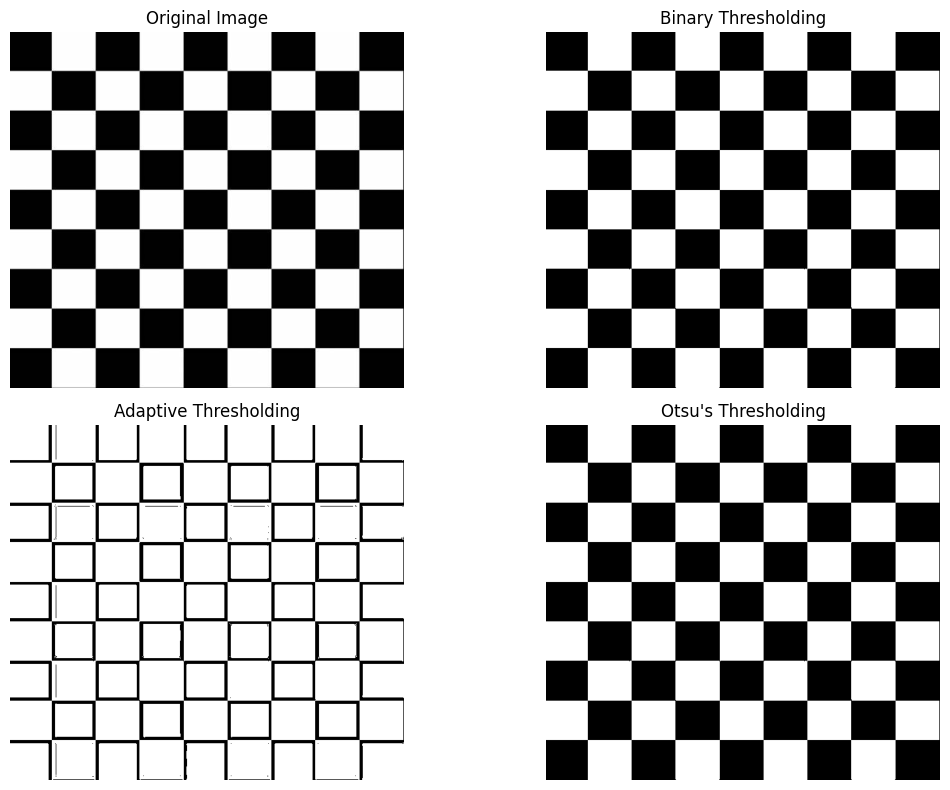

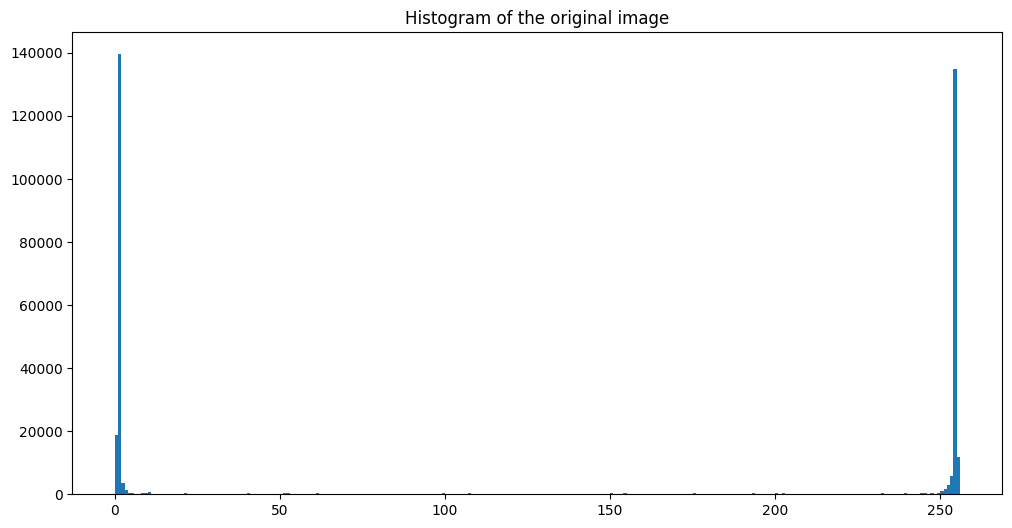

In [4]:
bnw_img = DATA_DIR + "bnw.png"

img, binary, adaptive, otsu = apply_thresholding_methods(bnw_img)

plt.figure(figsize=(12, 6))
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of the original image')
plt.show()

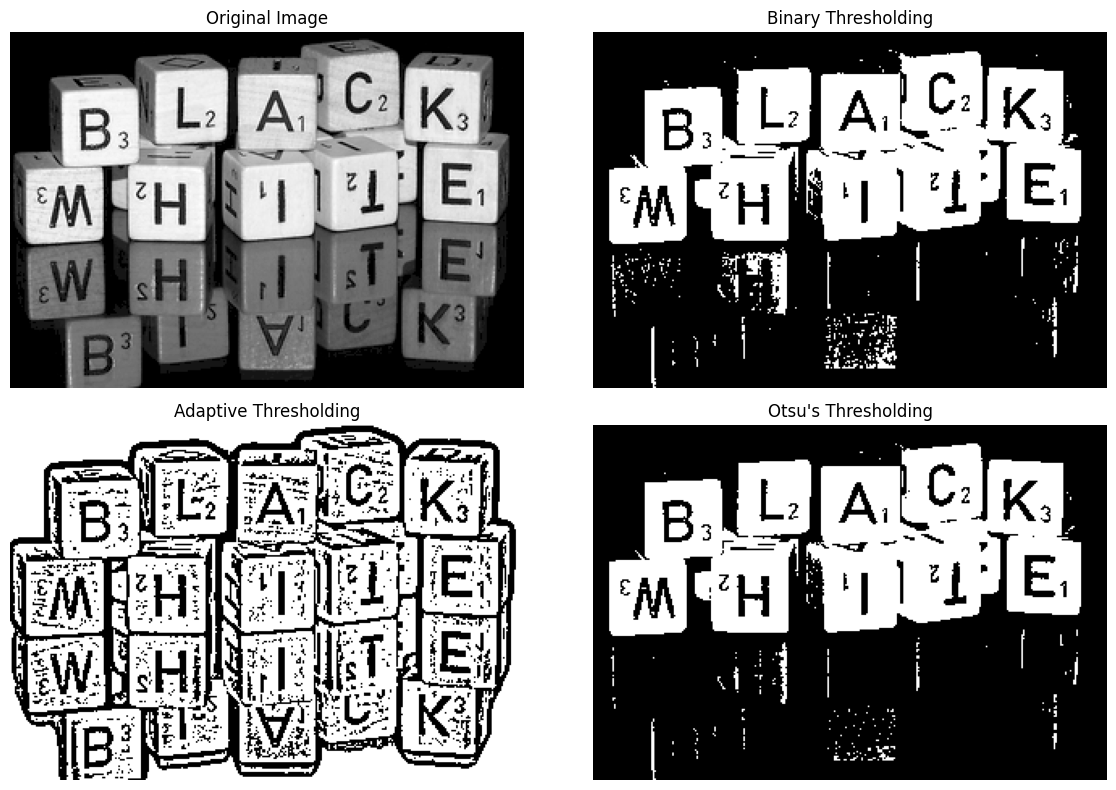

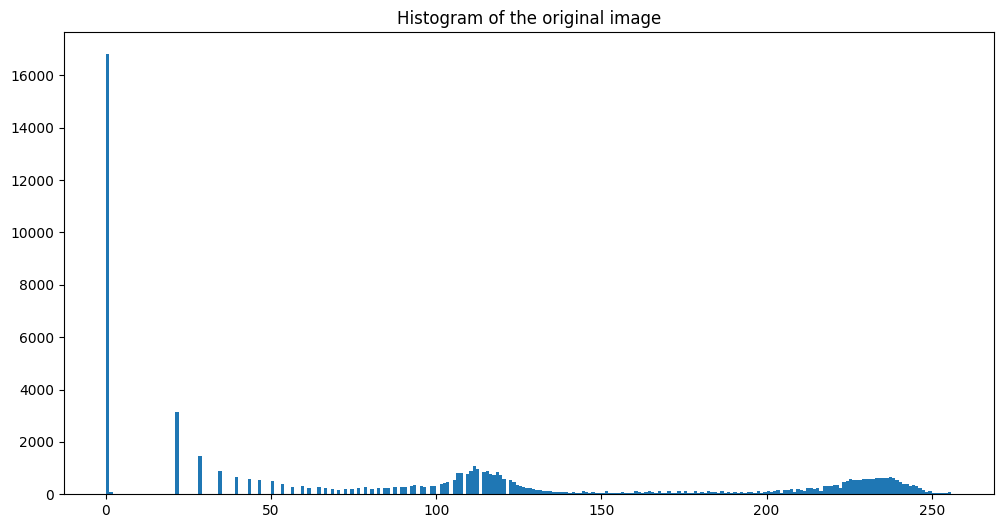

In [5]:
grayscale_img_path = DATA_DIR + "grayscale.png"
img, binary, adaptive, otsu = apply_thresholding_methods(grayscale_img_path)

plt.figure(figsize=(12, 6))
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of the original image')
plt.show()

### Adding Gaussian Noise and Salt-and-Pepper Noise to the image and then applying the thresholding

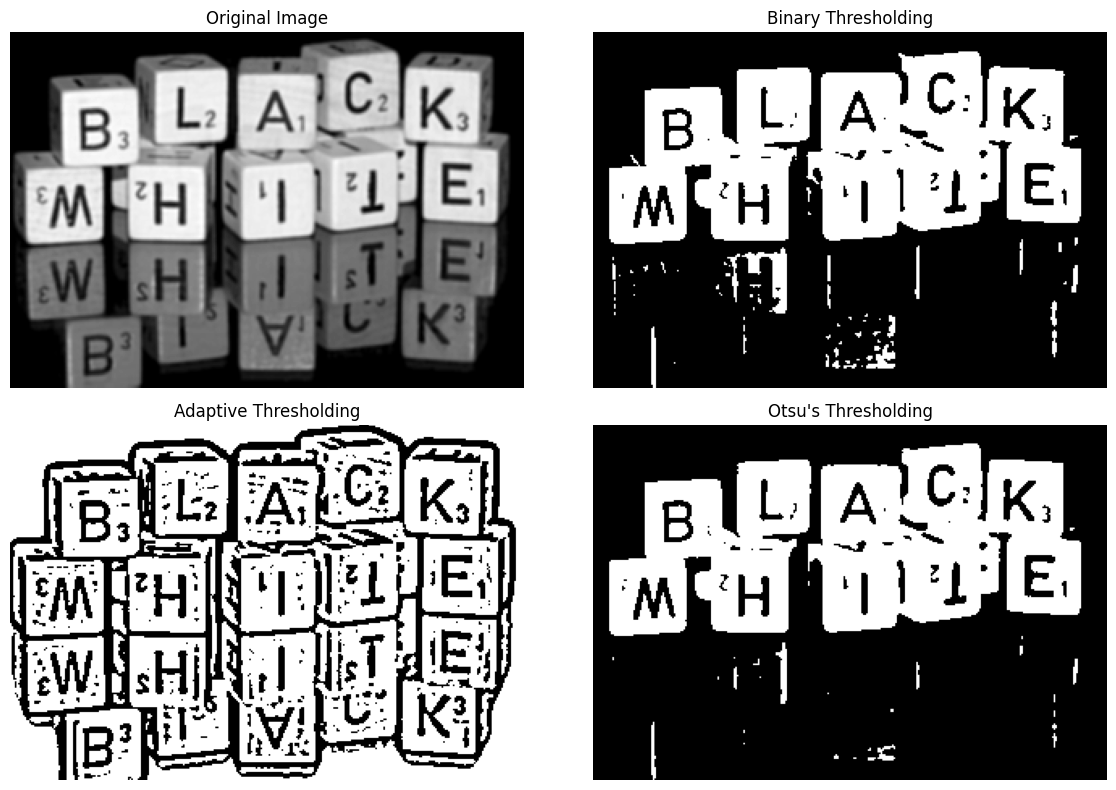

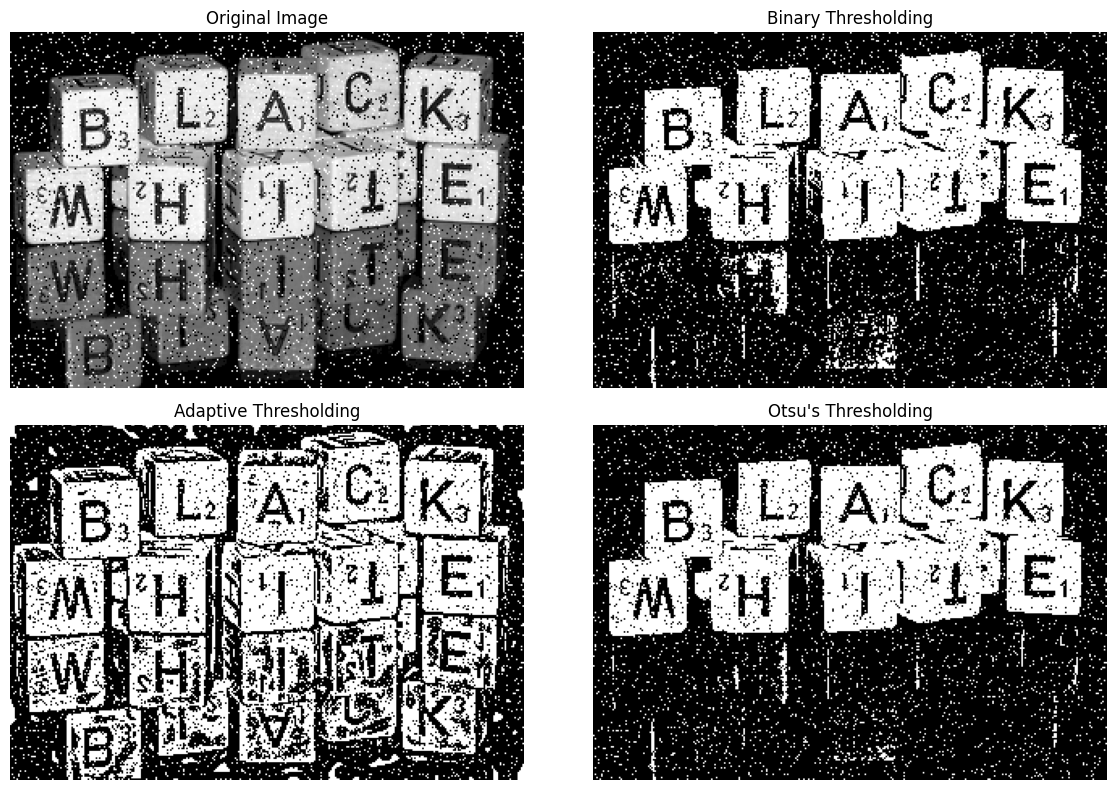

In [6]:
noisy_img = cv2.imread(grayscale_img_path, cv2.IMREAD_GRAYSCALE)
noisy_img = cv2.GaussianBlur(noisy_img, (5, 5), 0)
noisy_img = cv2.addWeighted(noisy_img, 1.5, cv2.blur(noisy_img, (5, 5)), -0.5, 0)
cv2.imwrite(DATA_DIR + "noisy_gaussian.png", noisy_img)

img, binary, adaptive, otsu = apply_thresholding_methods(DATA_DIR + "noisy_gaussian.png")

noisy_img = cv2.imread(grayscale_img_path, cv2.IMREAD_GRAYSCALE)
salt_pepper = np.random.randint(0, 2, noisy_img.shape[:2])
for i in range(noisy_img.shape[0]):
    for j in range(noisy_img.shape[1]):
        if salt_pepper[i, j] == 0 and np.random.randint(0, 10) < 1:
            noisy_img[i, j] = 0
        elif salt_pepper[i, j] == 1 and np.random.randint(0, 10) < 1:
            noisy_img[i, j] = 255

cv2.imwrite(DATA_DIR + "noisy_salt_pepper.png", noisy_img)

img, binary, adaptive, otsu = apply_thresholding_methods(DATA_DIR + "noisy_salt_pepper.png")

## Observations:

1. <strong>Binary Thresholding</strong>:
- This method segments the image based on a fixed threshold value. It works well for images with distinct foreground and background intensities but struggles with images that have uneven lighting or shadows.

2. <strong>Adaptive Thresholding</strong>:
- This method calculates thresholds locally, making it robust to variations in lighting. It typically provides better results for images with uneven illumination.

3. <strong>Otsu’s Thresholding</strong>:
- This method automatically determines the optimal threshold value by minimizing intra-class variance. It works well when the image has a bimodal histogram but is struggling with non-bimodal distributions or noisy images.

### Introduction of Salt-and-Pepper and Gaussian Noise (object boundaries blurred):
- Adaptive Thresholding works well in scenarios with noise because it computes the threshold locally, making it more robust against the presence of localized noise compared to global methods like Otsu or Binary thresholding.
- As expected, Adaptive Thresholding outperformed other methods when salt-and-pepper or Gaussian noise was introduced. It effectively adapts to the changing intensity variations, preserving object boundaries in the presence of noise.

### Almost Black-and-White (Bimodal) Image:

- Adaptive Thresholding can sometimes over-segment or change the structure of a bimodal image like a checkerboard. This is because Adaptive Thresholding relies on a neighborhood-based calculation, which is unnecessary for an already high-contrast bimodal structure.
- In such cases, Otsu's Thresholding or Binary Thresholding is more effective because these methods take the entire image into account to determine the threshold, making them better suited for maintaining the original structure of high-contrast images.